# **Introduction**


Vision Zero is a strategy to eliminate all traffic fatalities and severe injuries, while increasing safe, healthy, equitable mobility for all. First implemented in Sweden in the 1990s, Vision Zero has proved successful across Europe — and now it's gaining momentum in major American cities.

Vision Zeros impact on accidents and fatalities. 

Date range:  2012-07-01 00:00:00  -  2023-03-04 00:00:00

– Data source – 

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Person/f55k-p6yu

Initial import file: Rows, Columns: (1914445, 29)

After cleaning: Rows, Columns: (1299585, 29)


– Methodologies – 

Python libraries, types of visualizations, data cleaning, transformations, etc.


– Findings and conclusions – 

what did you learn from the data? Was it what
you expected?   stations that are longer than 60 seconds in duration

In [1]:
#1. Has NYC Vision zero made an impact on the safety of NYC?
#2.  What kind of recommendations can be presented to NYC to improve the program?
#3.  What seems to be working or not working?

# Imports

In [2]:
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import seaborn as sns # useful for plotting and graphing, built upon the matplotlib library.
import matplotlib.pyplot as plt
import geopy #ploting by location longitude and latitude 
from geopy.geocoders import Nominatim as nm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#Further consideration ['COLLISION_ID']join on
#vzmvcpc = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes.csv')

vzmvcc = pd.read_csv('/content/sample_data/Motor_Vehicle_Collisions_-_Person.csv', error_bad_lines = False)

<ipython-input-6-bc918fb17abe>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  vzmvcc = pd.read_csv('/content/sample_data/Motor_Vehicle_Collisions_-_Person.csv', error_bad_lines = False)


## **Exploring the data**

In [7]:
print('Rows, Columns:', vzmvcc.shape)

Rows, Columns: (890959, 21)


In [8]:
vzmvcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890959 entries, 0 to 890958
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   UNIQUE_ID              890959 non-null  int64  
 1   COLLISION_ID           890959 non-null  int64  
 2   CRASH_DATE             890959 non-null  object 
 3   CRASH_TIME             890959 non-null  object 
 4   PERSON_ID              890957 non-null  object 
 5   PERSON_TYPE            890959 non-null  object 
 6   PERSON_INJURY          890959 non-null  object 
 7   VEHICLE_ID             834437 non-null  float64
 8   PERSON_AGE             815943 non-null  float64
 9   EJECTION               444088 non-null  object 
 10  EMOTIONAL_STATUS       460648 non-null  object 
 11  BODILY_INJURY          460678 non-null  object 
 12  POSITION_IN_VEHICLE    444203 non-null  object 
 13  SAFETY_EQUIPMENT       444168 non-null  object 
 14  PED_LOCATION           18587 non-nul

In [9]:
# display counts of missing values with a summary list
vzmvcc.isnull().sum()

UNIQUE_ID                     0
COLLISION_ID                  0
CRASH_DATE                    0
CRASH_TIME                    0
PERSON_ID                     2
PERSON_TYPE                   0
PERSON_INJURY                 0
VEHICLE_ID                56522
PERSON_AGE                75016
EJECTION                 446871
EMOTIONAL_STATUS         430311
BODILY_INJURY            430281
POSITION_IN_VEHICLE      446756
SAFETY_EQUIPMENT         446791
PED_LOCATION             872372
PED_ACTION               872419
COMPLAINT                430277
PED_ROLE                  45654
CONTRIBUTING_FACTOR_1    873636
CONTRIBUTING_FACTOR_2    873663
PERSON_SEX               119722
dtype: int64

In [10]:
vzmvcc.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [11]:
vzmvcc.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [12]:
vzmvcc.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')

# Cleaning, Sorting, Wrangling

In [13]:
# drop duplicate data 
vzvcc = vzmvcc.drop_duplicates()
vzvcc.shape == vzmvcc.shape  
# vzmvcc Rows, Columns: (4757334, 21), no duplicate rows

True

In [14]:
print('Rows, Columns:', vzvcc.shape)

Rows, Columns: (890959, 21)


<Axes: >

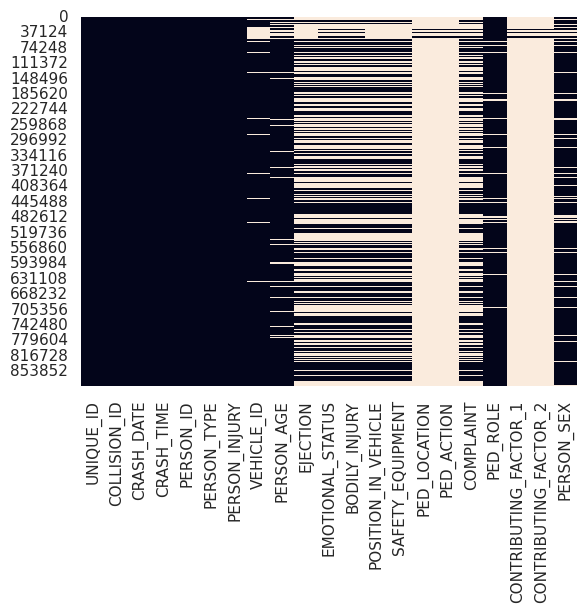

In [15]:
# check missing values in different columns via heatmap
sns.heatmap(vzvcc.isnull(), cbar=False) 
#the column of ['LOCATION', 'PED_ACTION', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2'] have many missing values

## Dropping columns

In [16]:
drop_cols = ['PED_LOCATION', 'PED_ACTION', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2']
vzvcc.drop(drop_cols, inplace = True, axis=1)

In [17]:
vzvcc.shape

(890959, 17)

##Dropping rows with missing values


In [18]:
# another way to do it: df3 = df3.dropna()
# Vision Zero Vehicle Crash/Colission Report
#vzvcc = vzvcc.dropna(inplace = True)

In [19]:
vzvcr = vzvcc

##Decriptives/Exploring

In [20]:
print(vzvcr['PERSON_AGE'].value_counts())

 0.0       126162
 27.0       17687
 28.0       17478
 29.0       17458
 30.0       17336
            ...  
-922.0          1
 820.0          1
 1111.0         1
 944.0          1
-924.0          1
Name: PERSON_AGE, Length: 470, dtype: int64


In [21]:
vzvcr.PERSON_AGE = vzvcr.PERSON_AGE.map(lambda x: np.nan if x <0 or x >100 else x)

In [22]:
print(vzvcr['PERSON_AGE'].value_counts())

0.0      126162
27.0      17687
28.0      17478
29.0      17458
30.0      17336
          ...  
95.0         52
96.0         38
100.0        25
97.0         19
98.0         19
Name: PERSON_AGE, Length: 101, dtype: int64


In [23]:
vzvcr.groupby(['PERSON_SEX','PERSON_INJURY'])['PERSON_AGE'].mean().sort_values(ascending=True)

PERSON_SEX  PERSON_INJURY
U           Unspecified       1.626453
            Injured          30.277311
M           Injured          36.454406
F           Unspecified      36.862150
            Injured          37.761240
M           Unspecified      39.183330
            Killed           47.896907
F           Killed           60.942529
Name: PERSON_AGE, dtype: float64

In [24]:
vzvcr.groupby(['PERSON_SEX','PERSON_INJURY'])['PERSON_AGE'].median().sort_values(ascending=True)

PERSON_SEX  PERSON_INJURY
U           Unspecified       0.0
            Injured          30.0
M           Injured          34.0
F           Injured          35.0
            Unspecified      36.0
M           Unspecified      39.0
            Killed           48.0
F           Killed           67.0
Name: PERSON_AGE, dtype: float64

In [25]:
print('Personal Injury: \n',vzvcr['PERSON_INJURY'].value_counts())

Personal Injury: 
 Unspecified    783222
Injured        107241
Killed            496
Name: PERSON_INJURY, dtype: int64


In [26]:
vzvcr.COLLISION_ID.is_unique

False

In [27]:
#INDEX
vzvcr.UNIQUE_ID.is_unique

True

In [28]:
print(vzvcr['EMOTIONAL_STATUS'].unique())

[nan 'Does Not Apply' 'Conscious' 'Unknown' 'Shock' 'Incoherent'
 'Semiconscious' 'Apparent Death' 'Unconscious']


In [29]:
vzvcr.groupby(['PERSON_SEX','EMOTIONAL_STATUS'])['PERSON_AGE'].mean().sort_values(ascending=True)

PERSON_SEX  EMOTIONAL_STATUS
U           Unknown             11.178571
            Does Not Apply      19.651456
            Conscious           32.495575
M           Unknown             33.835648
F           Unknown             34.588643
M           Shock               36.439768
F           Does Not Apply      36.889586
M           Conscious           36.994722
F           Conscious           37.810213
            Shock               38.078105
M           Semiconscious       38.771523
            Does Not Apply      39.405927
U           Unconscious         40.000000
M           Incoherent          40.440860
            Apparent Death      40.956284
            Unconscious         41.537037
F           Semiconscious       44.647059
            Unconscious         44.750000
            Incoherent          44.850746
            Apparent Death      50.757576
U           Shock               52.000000
            Apparent Death            NaN
            Semiconscious             NaN
Name:

In [30]:
vzvcr.groupby(['PERSON_SEX','EMOTIONAL_STATUS'])['PERSON_AGE'].median().sort_values(ascending=True)

PERSON_SEX  EMOTIONAL_STATUS
U           Unknown              0.0
            Does Not Apply      11.0
M           Unknown             31.0
F           Unknown             32.0
U           Conscious           34.0
M           Shock               34.0
F           Conscious           35.0
            Does Not Apply      35.0
M           Conscious           35.0
            Semiconscious       35.0
F           Shock               36.0
M           Incoherent          37.5
            Unconscious         38.0
            Does Not Apply      38.0
            Apparent Death      39.0
U           Unconscious         40.0
F           Incoherent          41.0
            Unconscious         43.5
            Semiconscious       45.0
U           Shock               52.0
F           Apparent Death      52.0
U           Apparent Death       NaN
            Semiconscious        NaN
Name: PERSON_AGE, dtype: float64

In [31]:
print(vzvcr['PERSON_SEX'].unique())

['U' 'F' 'M' nan]


In [32]:
print(vzvcr['PERSON_TYPE'].unique())

['Occupant' 'Pedestrian' 'Bicyclist' 'Other Motorized']


In [33]:
vzvcr.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'COMPLAINT', 'PED_ROLE', 'PERSON_SEX'],
      dtype='object')

## **Renaming columns**

In [34]:
vzbcr = vzvcr.rename(columns= {'CRASH_DATE': 'DATE', 'CRASH_TIME': 'TIME', 'PERSON_AGE': 'AGE', 'PERSON_SEX': 'GENDER'})

In [35]:
vzbcr.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'DATE', 'TIME', 'PERSON_ID', 'PERSON_TYPE',
       'PERSON_INJURY', 'VEHICLE_ID', 'AGE', 'EJECTION', 'EMOTIONAL_STATUS',
       'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'COMPLAINT',
       'PED_ROLE', 'GENDER'],
      dtype='object')

## Converting the date and time columns to to their specified data types

In [45]:
# Converting the date column to its specified data type
vzvcr['DATE'] = pd.to_datetime(vzbcr['DATE'])

In [46]:
#check min max crash dates
min_date = min(vzvcr['DATE'])
max_date = max(vzvcr['DATE'])
print('Date range: ', min_date, ' - ', max_date)

Date range:  2012-07-01 00:00:00  -  2023-03-04 00:00:00


In [48]:
# Creating three new columns for easy querying
vzvcr['YEAR'] = vzvcr.DATE.dt.year
vzvcr['MONTH'] = vzvcr.DATE.dt.month
vzvcr['DAY'] = vzvcr.DATE.dt.day

## **Narrowing the PERSON_TYPE to Bicycling Looking for the affects by year of Vision zero ecspecially in relation to the areas that citibike is expanding into. (need to cross compare analysis to city bike expansion data.**

#Visualizations

##2019 Bicycle realted incidencts 


In [53]:
vzbr2019 = vzvcr

In [57]:
vzbr2019.tail()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,DATE,YEAR,MONTH,DAY
890954,7124648,3729950,08/09/2017,0:00,09fbbc72-adcc-48d4-a0f9-32359d9f430c,Occupant,Unspecified,17600786.0,0.0,NaN,...,NaN,NaN,NaN,NaN,Registrant,M,2017-08-09,2017,8,9
890955,9708063,3964958,08/17/2018,15:57,482390bb-7af7-4e13-bbf3-814bf7ac1e26,Occupant,Injured,18871760.0,58.0,Not Ejected,...,Chest,Driver,Lap Belt & Harness,Complaint of Pain or Nausea,Driver,F,2018-08-17,2018,8,17
890956,7006916,3677251,05/20/2017,20:55,86db74ae-1972-4920-ba9b-1e1b8a352938,Occupant,Unspecified,17544572.0,37.0,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,Does Not Apply,Driver,M,2017-05-20,2017,5,20
890957,9069864,4093081,03/07/2019,11:45,9b3781c6-3a2f-4d57-be73-528b6aa4f1b4,Occupant,Unspecified,18557113.0,12.0,Not Ejected,...,Does Not Apply,"Any person in the rear of a station wagon, pic...",Lap Belt,Does Not Apply,Passenger,F,2019-03-07,2019,3,7
890958,6040840,3599715,01/13/2017,16:33,517d407b-1d69-42aa-990f-eaddbf0d93d6,Occupant,Unspecified,17083749.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-13,2017,1,13


In [60]:
after2019 = vzbr2019[(vzbr2019['DATE'] <= '2019-01-01') | (vzbr2019['DATE'] >= '2019-12-31') | (vzbr2019['PERSON_TYPE'] == 'Occupant') | (vzbr2019['PERSON_TYPE'] == 'Pedestrian') | (vzbr2019['PERSON_TYPE'] == 'Other Motorized')].index
vzbr2019.drop(after2019, inplace=True)
#| (vzbr2020['PERSON_INJURY'] == 'Unspecified') 

<Axes: >

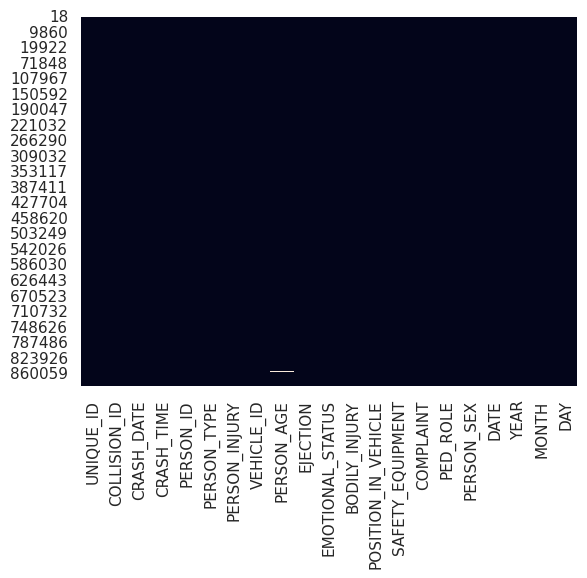

In [61]:
sns.heatmap(vzbr2019.isnull(), cbar=False) 

In [62]:
vzbr2019.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,DATE,YEAR,MONTH,DAY
18,10254556,4230715,10/26/2019,8:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,42.0,Not Ejected,...,Knee-Lower Leg Foot,Driver,Unknown,None Visible,Driver,M,2019-10-26,2019,10,26
31,10250834,4230376,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,36.0,Not Ejected,...,Back,Driver,None,Internal,Driver,M,2019-10-26,2019,10,26
69,10251056,4230439,10/26/2019,0:05,4cd0f087-b091-4f0c-9ac3-b1a639444f1b,Bicyclist,Injured,19142063.0,35.0,Ejected,...,Elbow-Lower-Arm-Hand,Driver,None,Minor Bleeding,Driver,M,2019-10-26,2019,10,26
181,10249843,4230242,10/26/2019,6:54,2799c10b-ee13-4be0-9449-1d617b8ddf63,Bicyclist,Injured,19141508.0,47.0,Not Ejected,...,Back,Driver,Helmet Only (In-Line Skater/Bicyclist),None Visible,Driver,M,2019-10-26,2019,10,26
499,10254980,4230579,10/25/2019,22:24,c2282d79-91c6-4886-80f1-c968f92b9073,Bicyclist,Injured,19144039.0,34.0,Ejected,...,Back,Driver,Helmet Only (In-Line Skater/Bicyclist),Complaint of Pain or Nausea,Driver,M,2019-10-25,2019,10,25


In [63]:
vzbr2019.shape

(1309, 21)

##2019 Crashes and Colissions involving Bicycles 

Dropping Columns that have a majority of null value after narrowing the dataframe to PERSON_TYPE == 'Bicyclist'

['Unique ID', 'Collision ID', 'Crash Date', 'Crash Time', 'Person ID', 'Person Type', 'Person Injury', 'VEHICLE_ID', 'Age', 'EJECTION', 'Emotional Status', 'Bodily Injury', 'POSITION_IN_VEHICLE','Safety Equipment', 'COMPLAINT', 'Person Role', 'Gender']

In [65]:
vzbcmc = vzbr2019['DATE'].dt.month.sort_index()

In [ ]:
vzbcmc = vzbr2019['Crash Date'].dt.month.value_counts().sort_index()
plt.bar(vzbcmc.index,vzbcmc.values)
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Crashes or Collisions Involving a Bike in NYC for Months of 2019')
plt.show()
#2020 april...why? rain or covid

In [ ]:
vzbctc = vzbr2019['Crash Time'].str.split(':').str[0].astype('int').value_counts().sort_index()

In [ ]:
plt.bar(vzbctc.index,vzbctc.values)
plt.xticks(range(0,24,4),[str(x)+":00" for x in range(0,24,4)])
plt.xlabel('Hourly')
plt.ylabel('Count')
plt.title('Crashes or Collisions Involving a Bike in NYC 2019 Hourly Counts')
plt.show()

In [ ]:
# create a representation of the month with strfmt
vzbr2019['Month Year'] = vzbr2019['Crash Date'].map(lambda dt: dt.strftime('%Y-%m'))
grouped_vzbr2019 = vzbr2019.groupby('Month Year').size().to_frame("count").reset_index()
grouped_vzbr2019.plot(kind='bar', x='Month Year', y='count')
#sns.lmplot(data=vzbr2019, x='Collision ID', y='Crash Time', col='Person Injury', hue='Gender')

In [ ]:
print(vzbr2019['Bodily Injury'].unique())

In [ ]:
print('Bodily Injury: \n', vzbr2019['Bodily Injury'].value_counts())

In [ ]:
print(vzbr2019['Gender'].value_counts())

In [ ]:
vzbr2019['Bodily Injury'].value_counts().plot.pie(figsize=(14,10), title='2019 Bicyclist Bodily Injuries due to Collision or Crash')

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(data=vzbr2019, x='Bodily Injury', y='Age', hue='Gender', order = ['Unknown', 'Head', 'Neck', 'Shoulder-Upper Arm', 'Face', 'Eye', 'Elbow-Lower Arm-Hand', 'Chest', 'Abdomen-Pelvis', 'Entire Body', 'Knee-Lower Leg Foot', 'Back', 'Hip-Upper Leg', 'Does Not Apply'], palette = "muted" )
plt.title("2019 Bodily Injuries of Bicyclist in a crash or colission")
plt.show()

In [ ]:
print('Emotional Status: \n', vzbr2019['Emotional Status'].value_counts())

In [ ]:
vzbr2019['Emotional Status'].value_counts().plot.pie(figsize=(20,20), title='2019 Bicyclist Emotional Status at Time of Collision or Crash')

In [ ]:
plt.figure(figsize=(14, 5))
sns.barplot(data=vzbr2019, x='Emotional Status', y='Age', hue='Gender', order = ['Unknown','Conscious', 'Semiconscious', 'Unconscious', 'Shock', 'Incoherent', 'Apparent Death', 'Does Not Apply'], palette = "muted" )
plt.title("2019 Emotional Status of Bicyclist in a crash or colission")
plt.show()
#Unknown seem to be soley conciou

In [ ]:
sns.pairplot(data=vzbr2019, hue='Emotional Status',  palette='Spectral_r') 

In [ ]:
print('Person Injury: \n', vzbr2019['Person Injury'].value_counts())

In [ ]:
vzbr2019['Person Injury'].value_counts().sum()

In [ ]:
vzbr2019['Person Injury'].value_counts().plot.pie(figsize=(14,10), title='2019 Bicyclist Status due to Collision or Crash')

In [ ]:
plt.figure(figsize=(14, 5))
sns.barplot(data=vzbr2019, x='Person Injury', y='Age', hue='Gender', order = ['Killed', 'Injured', 'Unspecified'], palette = "muted" )
plt.title("2019 Injury Status of Bicyclist because of a crash or colission")
plt.show()
#U

column compaired to self histogram when its not it is in indescrete form.//// cant use descrete values need to have continuouse data types...
a good way to see if data is workable also. 

In [ ]:
sns.pairplot(data=vzbr2019, hue='Gender',  palette='icefire') 

In [ ]:
vzbr2019.groupby(['Gender','Person Injury'])['Age'].mean().sort_values(ascending=True)

In [ ]:
sns.pairplot(data=vzbr2019, hue='Person Injury',  palette='PuOr') 

In [ ]:
sns.pairplot(data=vzbr2019, hue='Bodily Injury',  palette='Spectral') 

In [ ]:
sns.pairplot(data=vzbr2019, hue='Person Role',  palette='Spectral') 

In [ ]:
sns.pairplot(data=vzbr2019, hue='Emotional Status',  palette='Spectral_r') 

#Summary


## **FOR FUTURE CONSIDERATION**

# New Section

In [ ]:
#print('Rows, Columns:', vzvcr.shape)

In [ ]:
#print(vzvcr.info())

TROUBLE WITH IT NOT RECOGINIZINTG SECOND/THIRD DATAFRAME SET

In [ ]:
#for col in df:
  #print(df[col].unique())


In [ ]:
#df3.set_index('encounter_id')

## 1.   Bicycling Injuries





In [ ]:
#vzbi = vzvcr

In [ ]:
bicycling_injuries = vzbi [(vzbi['PERSON_INJURY'] == 'Killed') | (vzbi['PERSON_INJURY'] == 'Unspecified')].index
vzbi.drop(bicycling_injuries , inplace=True)

In [ ]:
print('Rows, Columns:', vzbi.shape)

In [ ]:
print(vzbi.shape)

In [ ]:
sns.pairplot(data=vzbi, hue='EMOTIONAL_STATUS',  palette='Spectral_r') 

##2. Bicycling Deaths

In [ ]:
vzvcr.shape

In [ ]:
#vzbd = vzvcr

In [ ]:
bicycling_injuries = vzbd [(vzbd['PERSON_INJURY'] == 'Injured') | (vzbd['PERSON_INJURY'] == 'Unspecified')].index
vzbd.drop(bicycling_injuries , inplace=True)

In [ ]:
print('Rows, Columns:', vzbd.shape)

In [ ]:
sns.pairplot(data=vzbd, hue='EMOTIONAL_STATUS',  palette='Spectral_r') 

##3. Bicycling Unspecified

In [ ]:
#vzbu = vzvcr

In [ ]:
bicycling_injuries = vzbu [(vzbu['PERSON_INJURY'] == 'Killed') | (vzbu['PERSON_INJURY'] == 'Injured')].index
vzbu.drop(bicycling_injuries , inplace=True)

In [ ]:
print('Rows, Columns:', vzbu.shape)

# **@**

In [ ]:
df2 = ddf.sort_values([ 'patient_nbr', 'Race', 'Gender', 'Age','Medical Specialty'], ascending=True).groupby(['Medical Specialty', 'patient_nbr', 'Gender', 'Age', 'Race']).head()

# to look over

In [ ]:
df3 = df2.sort_values(['encounter_id', 'Medical Specialty'], ascending=True).groupby(['Medical Specialty', 'patient_nbr', 'Gender', 'Age', 'Race']).head()

## **Setting the index**

## **Visualizations**

# New Section

In [ ]:
sns.scatterplot(x='num_lab_procedures', y='num_medications', data=df3, hue='diabetesMed', palette='GnBu_r', marker='d', alpha=.25)

In [ ]:
sns.pointplot(x='num_medications', y='num_procedures', data=df3, hue='Race', dodge=.3 - .3 / 3, join=False, palette='Spectral', markers='d', alpha=.75, scale=.75, ci=None)

In [ ]:
sns.jointplot(x='num_lab_procedures', y='num_medications', data=df3, kind='hex')

In [ ]:
sns.distplot(df3['num_medications'], bins=50)

In [ ]:
prosxmedsxr = sns.FacetGrid(ddfadult, col='Medical Specialty', hue='Race', height=6, aspect=1, palette='Spectral', col_wrap=10)
prosxmedsxr.map(sns.barplot, 'Race', 'num_procedures', order=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'])

In [ ]:
#@title
sns.lmplot(x='num_lab_procedures', y='num_medications', data=ddfadult, hue='Race', height=8, palette='Spectral', markers='d')